In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor
import colorsys
import os

---

### Distance Matrix

In [6]:
def read_adj_matrix(filename):
    with open(filename, 'rt') as f:
        n = int(f.readline())
        matrix = np.zeros((n, n))
        filenames = np.empty(n, dtype=object)
        for i in range(n):
            line = f.readline().split()
            filenames[i] = line[0]
            for j in range(n):
                matrix[i, j] = float(line[j + 1])

    # Order matrix by filenames
    idx = np.argsort(filenames)
    filenames = filenames[idx]
    matrix = matrix[idx, :][:, idx]

    return matrix, filenames

matrix, filenames = read_adj_matrix('./out/step-by-step/test-imports/matriz-adjacencias-hamming.phylip')



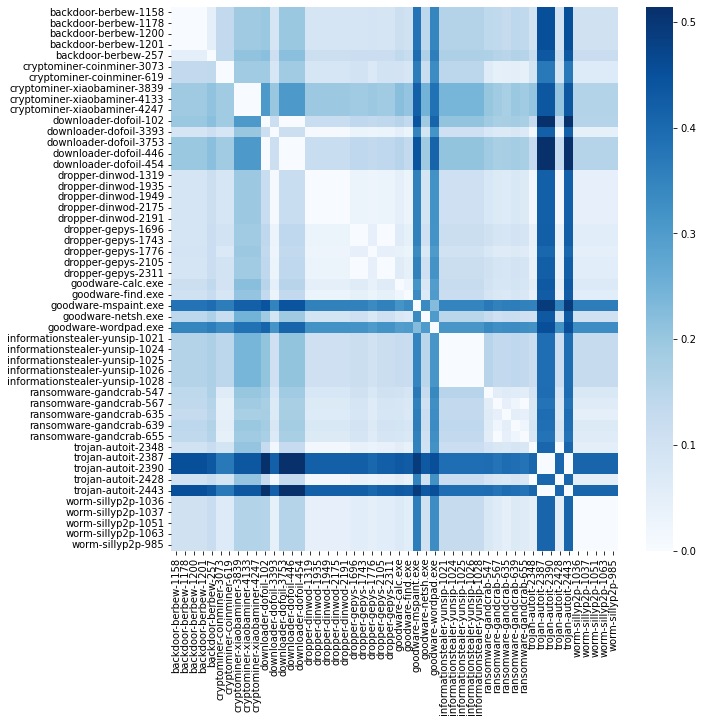

In [7]:
# Heatmap of the matrix
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, xticklabels=filenames, yticklabels=filenames, cmap='Blues')
plt.savefig('./out/step-by-step/test-imports/matriz-adjacencias-hamming.png', dpi=300)

---

### Arvore Gerada

In [9]:
os.system('smot color leaf -P -p "." "#000000" \
            -p "backdoor-*" "#1f77b4" \
            -p "cryptominer-*" "#ff7f0e" \
            -p "downloader-*" "#2ca02c" \
            -p "dropper-*" "#d62728" \
            -p "goodware-*" "#9467bd" \
            -p "informationstealer-*" "#8c564b" \
            -p "ransomware-*" "#e377c2" \
            -p "trojan-*" "#bcbd22" \
            -p "worm-*" "#17becf" \
            tree.newick \
            | smot color pull \
            | smot color leaf -P -p "." "#000000"> tree.nexus')

"""
blue: #1f77b4
orange: #ff7f0e
green: #2ca02c
red: #d62728
purple: #9467bd
brown: #8c564b
pink: #e377c2
olive: #bcbd22
cyan: #17becf
"""

os.system('figtree ./tree.nexus')

javax.swing.UIManager$LookAndFeelInfo[Metal javax.swing.plaf.metal.MetalLookAndFeel]
javax.swing.UIManager$LookAndFeelInfo[Nimbus javax.swing.plaf.nimbus.NimbusLookAndFeel]
javax.swing.UIManager$LookAndFeelInfo[CDE/Motif com.sun.java.swing.plaf.motif.MotifLookAndFeel]
javax.swing.UIManager$LookAndFeelInfo[GTK+ com.sun.java.swing.plaf.gtk.GTKLookAndFeel]


---

### Clusters Gerados

In [1]:
node_clustering_fn = './out/step-by-step/test-imports/node_clustering_fastgreedy.txt'

lines = open(node_clustering_fn, 'r').readlines()
lines = lines[1:]
clusters = [[el.strip() for el in line.strip().split(',') if not el.strip().startswith('-')] for line in lines]